### Redshift of LMM Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

In [3]:
forest_table = pd.read_hdf('/data/a/cpac/aurora/reducedtrees.h5', 'ft')
with open("/data/a/cpac/xinliu/reducedtrees/progenitor_idx.txt") as f:
    progenitor_idx = [[int(p) for p in s.strip().split(" ")] if s.strip() != "" else [] for s in f]

#### Establish Globals

In [10]:
n = 10
snap = 99 
snap2 = 98
snap3 = 97
mm_thresh1 = 1/10
mm_thresh2 = 0.3
norm = np.int(2.7*10**9)
xaxis = 'z_nums'
extremum = ''
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
#bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
small_bins = [10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins2 = [10**12, 10**12.5, 10**13, 10**13.5, 10**14, 10**14.5]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
norm_tf = True
avg_tf = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

#### 2a) PDF of LMMs: halos in a single range (no bins)

In [14]:
my_range1 = [10**12, 10**13]
halo_idx = help_func.find_halos(forest_table, snap, n, mass_range = my_range1)
xaxis = 'z_nums'
# Track the halo
a_snap_nums, a_masses, a_main_prog_list, a_maj_mergers, a_maj_merger_times = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [18]:
# Find the LMMs
a_LMM_redshifts = help_func.UPDATE_find_LMMs(a_maj_merger_times, forest_table, xaxis)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


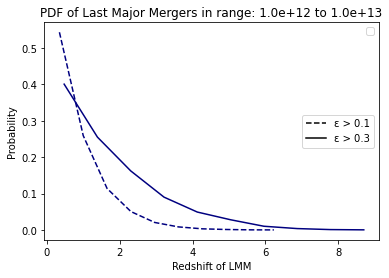

In [24]:
# Plot the PDF
help_func.plot_LMMs([a_LMM_redshifts], mass_range = my_range1, x_axis = xaxis)

#### 2b) PDF of LMMs: binned halos

In [22]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, large_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times = help_func.track_evol_binned(bin_halo_idx, large_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In track_evol_multiple
In track_evol_multiple
In track_evol_multiple
In track_evol_multiple
In track_evol_multiple


In [21]:
binned_LMM_times = help_func.find_LMMs_binned(binned_mm_times, forest_table, xaxis, redshifts)

IndexError: string index out of range

In [ ]:
# Plot the PDF
help_func.plot_LMMs(binned_LMM_times, mass_bins = large_bins, x_axis = xaxis)

#### 2c) CDF of LMMs: binned halos

In [13]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, small_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
%time binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times = help_func.track_evol_binned(bin_halo_idx, small_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In track_evol_multiple
In track_evol_multiple
In track_evol_multiple
CPU times: user 38.4 s, sys: 1.59 s, total: 40 s
Wall time: 38.8 s


In [14]:
binned_LMM_list, binned_LMM_times = help_func.find_LMMs_binned(binned_maj_mergers, binned_mm_times, forest_table, xaxis)

In [12]:
core_ids = []
for halo_ids in binned_LMM_list[0][0]: # First bin and first threshold
    a = core_ids.append(np.array(forest_table['core_id'][]))

SyntaxError: invalid syntax (<ipython-input-12-53f80ddc4628>, line 3)

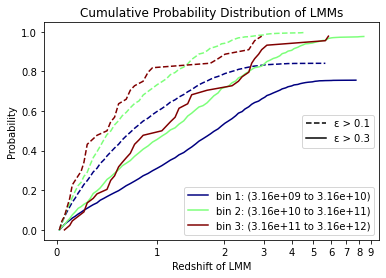

In [20]:
plt = help_func.plot_CDF(binned_LMM_times, binned_masses, large_bins, redshifts)